# 데이터 불러오기

In [1]:
!gdown 1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga
!unzip -oqq cats_and_dogs.zip

Downloading...
From (original): https://drive.google.com/uc?id=1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga
From (redirected): https://drive.google.com/uc?id=1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga&confirm=t&uuid=abe8c4f9-6ca1-4f57-9062-0555e8445f05
To: /content/cats_and_dogs.zip
100% 90.8M/90.8M [00:00<00:00, 93.2MB/s]


# 재현성 구현

In [2]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [3]:
SEED = 42

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
from glob import glob

In [5]:
cats_list = sorted(glob("train/cats/*.jpg"))
dogs_list = sorted(glob("train/dogs/*.jpg"))

len(cats_list), len(dogs_list)

(1000, 1000)

- 정답 데이터 만들기
    - 고양이: 0
    - 개 : 1
    

In [6]:
img_path = cats_list + dogs_list
labels = [0] * 1000 + [1] * 1000

train_path = np.array(img_path)
target = np.array(labels)

In [7]:
target

array([0, 0, 0, ..., 1, 1, 1])

- 데이터 랜덤화

In [8]:
np.random.seed(SEED)
idx_list = np.arange(train_path.shape[0])

np.random.shuffle(idx_list)
np.random.shuffle(idx_list)

train_path = train_path[idx_list]
target = target[idx_list]

- 이진분류 문제에서 주의할 점(pytorch)
    - 정답데이터는 2차원 형태이고, 데이터 타입은 float32 형태 여야 한다.

In [9]:
target = target.reshape(-1,1)
target.shape

(2000, 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
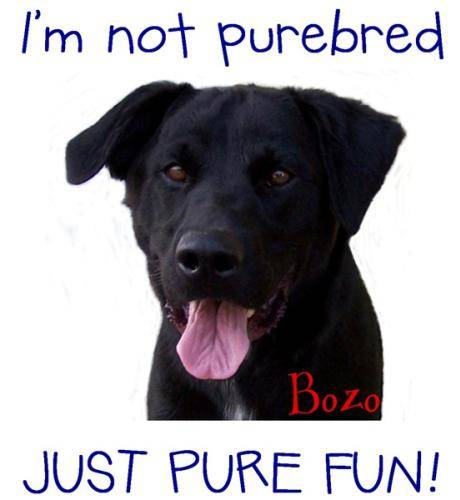

In [10]:
import cv2 # open cv
img = cv2.imread(train_path[0]) # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB
img

# albumentations 라이브러리

In [11]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2 # pillow객체 못받음, numpy배열로 받아야됨

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# Compose 클래스

In [12]:
resize = [150,150] # H,W
train_lst = [
    A.HorizontalFlip(p=0.5), # 데이터 증강
    A.Resize(*resize), # 각 이미지 같은 크기로 조정
    A.Normalize(), # 정규화진행
    ToTensorV2() # ToTensor 변환 > C,H,W
]

train_trans = A.Compose(train_lst)

test_lst = [
    A.Resize(*resize), # 각 이미지 같은 크기로 조정
    A.Normalize(), # 정규화진행
    ToTensorV2() # ToTensor 변환 > C,H,W
]

test_trans = A.Compose(test_lst)

In [13]:
train_trans(image= img)

{'image': tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],
 
         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],
 
         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.64

# 데이터셋 클래스

In [14]:
class CatDogDataset(torch.utils.data.Dataset):
  def __init__(self, transform, x, y=None):
    self.x = x
    self.y = y
    self.transform = transform

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    item = {}
    x = cv2.imread(self.x[idx])
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    item['x'] = self.transform(image = x)['image']
    if self.y is not None:
      item['y'] = torch.Tensor(self.y[idx]) # 다중분류문제 아니므로 float32

    return item

- 결과 확인하기

In [15]:
dt = CatDogDataset(train_trans, train_path, target)
dt[0]

{'x': tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],
 
         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],
 
         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400, 

In [16]:
dl = torch.utils.data.DataLoader(dt, batch_size = 2, shuffle = False)
batch = next(iter(dl))
batch

{'x': tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           ...,
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489]],
 
          [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           ...,
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286]],
 
          [[ 2.6400,  2.6400,  2.6400,  ...,  2.6400,  2.6400,  2.6400],
        

In [17]:
batch['x'].shape # batch, channel, height, width

torch.Size([2, 3, 150, 150])

In [18]:
batch['x'].dtype, batch['y'].dtype

(torch.float32, torch.float32)

# 신경망 모델클래스

In [19]:
class Net(torch.nn.Module):
    def __init__(self, out_channel=16, kernel_size=3):
        super().__init__()
        self.seq = torch.nn.Sequential(
            torch.nn.Conv2d(3, out_channel, kernel_size),
            torch.nn.BatchNorm2d(out_channel),
            torch.nn.ELU(),
            torch.nn.MaxPool2d(2),

            torch.nn.Conv2d(out_channel, out_channel*2, kernel_size),
            torch.nn.BatchNorm2d(out_channel*2),
            torch.nn.ELU(),
            torch.nn.MaxPool2d(2),

            torch.nn.AdaptiveMaxPool2d(1), # batch, channel, height, width -> batch, channel, 1, 1
            torch.nn.Flatten(),  # batch, channel, 1, 1 -> batch, channel
            torch.nn.Linear(out_channel*2, 1) # output layer
        )

    def forward(self, x):
        return self.seq(x)

In [20]:
model = Net()
model(batch["x"])

tensor([[0.2919],
        [0.2781]], grad_fn=<AddmmBackward0>)

# 학습데이터 loop 함수

In [21]:
def train_loop(dl, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train()
    for batch in dl:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dl)
    return epoch_loss

# 테스트데이터 loop 함수

In [22]:
@torch.no_grad()
def test_loop(dl, model, loss_fn, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in dl:
        pred = model( batch["x"].to(device) )
        if batch.get("y") is not None:
            loss = loss_fn(pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dl)
    return epoch_loss, pred

# 하이퍼파라미터 정의

In [23]:
n_splits = 5
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [25]:
train_path

array(['train/dogs/dog.900.jpg', 'train/dogs/dog.314.jpg',
       'train/cats/cat.232.jpg', ..., 'train/dogs/dog.59.jpg',
       'train/cats/cat.169.jpg', 'train/dogs/dog.54.jpg'], dtype='<U22')

# 조합 후 K-fold학습 수행

In [37]:
is_holdout = False
reset_seeds(SEED)
score_list = []
for i, (tri, vai) in enumerate(cv.split(train_path)):
    # 학습 데이터
    x_train = train_path[tri]
    y_train = target[tri]
    train_dt = CatDogDataset(train_trans, x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)
    # 검증 데이터
    x_valid = train_path[vai]
    y_valid = target[vai]
    valid_dt = CatDogDataset(test_trans, x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체 및 옵티마이저 생성
    model = Net().to(device)
    optimizer = torch.optim.Adam( model.parameters() )

      # # StepLR
    # optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
    # scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 2, gamma = 0.1) # batch_size 2번당 lr * gamma

    # # MultiStepLR
    # optimizer = torch.optim.Adam(model.parameters(), lr = 1)
    # scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones = [5,7], gamma = 0.1) # 5번,7번 epoch에서 lr * gamma

    # # ExponentialLR
    # optimizer = torch.optim.Adam(model.parameters(), lr = 1)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.7) # epoch 당 lr * gamma ** (인덱스순서)

    # # CosineAnnealingLR
    # optimizer = torch.optim.Adam(model.parameters(), lr = 1)
    # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 20) # T_max: epoch 수

    # ReduceLROnPlateau
    optimizer = torch.optim.Adam(model.parameters(), lr = 1)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor= 0.5, patience= 20, mode = 'max')

    patience = 0 # 조기 종료 조건을 주기 위한 변수
    best_score = 0 # 현재 최고점수
    for _ in range(epochs):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        scheduler.step(train_loss)

        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
        pred = (pred > 0.5).astype(int)
        score = accuracy_score(y_valid, pred)
        patience += 1

        if score > best_score:
            best_score = score
            patience = 0
            torch.save( model.state_dict(), f"model_{i}.pt" )

        if patience == 5:
            break

    score_list.append(best_score)
    print(f"ACC 최고점수: {best_score}")

    if is_holdout:
        break

ACC 최고점수: 0.595
ACC 최고점수: 0.5075
ACC 최고점수: 0.52
ACC 최고점수: 0.5025
ACC 최고점수: 0.5125


- 결과 확인하기

In [38]:
np.mean(score_list)

0.5275000000000001

# test데이터 추론하기

In [39]:
cats_test_list = sorted( glob("test/cats/*.jpg") ) # 0
dogs_test_list = sorted( glob("test/dogs/*.jpg") ) # 1

test_path = np.array(cats_test_list + dogs_test_list)
test_path

array(['test/cats/cat.1000.jpg', 'test/cats/cat.1001.jpg',
       'test/cats/cat.1002.jpg', ..., 'test/dogs/dog.1997.jpg',
       'test/dogs/dog.1998.jpg', 'test/dogs/dog.1999.jpg'], dtype='<U22')

In [40]:
y_test = np.array([0] * len(cats_test_list) + [1] * len(dogs_test_list))
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
test_dt = CatDogDataset(test_trans, test_path)
test_dl = torch.utils.data.DataLoader(test_dt, shuffle=False, batch_size=batch_size)

In [42]:
pred_list = []
for i in range(n_splits):
    model = Net().to(device)
    state_dict = torch.load(f"model_{i}.pt", weights_only=True)
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, None, device)
    pred_list.append(pred)

In [43]:
pred = np.mean(pred_list, axis=0)
pred = (pred > 0.5).astype(int)
pred.shape

(2000, 1)

In [44]:
accuracy_score(y_test, pred)

0.5685

# TTA(Test Time Augmentation)
- 딥러닝 모델의 성능을 향상시키기 위해, 테스트 단계 내 이미지에 다양한 변형 가하는 기법

- 테스트 이미지를 직접 증강을 적용해 예측

In [45]:
aug_list = [A.HorizontalFlip(p=1), A.Affine(p=1)]
tta_pred_list = []
for aug_obj in aug_list:

  lst = [
      A.Resize(*resize),
      A.Normalize(),
      ToTensorV2()
  ]

  trans = A.Compose(lst)
  test_dt = CatDogDataset(trans, test_path)
  test_dl = torch.utils.data.DataLoader(dt, batch_size= batch_size, shuffle = False)

  for i in range(n_splits):
    model = Net().to(device)
    state_dict = torch.load(f'model_{i}.pt', weights_only=True)
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, loss_fn, device)
    tta_pred_list.append(pred)

In [46]:
len(pred_list + tta_pred_list)

15

In [47]:
preds = pred_list + tta_pred_list

In [48]:
pred = np.mean(preds, axis = 0)
pred = np.where(pred > 0.5, 1,0)
pred.shape

(2000, 1)